**Name:** Jackson Manasseh Etim

**Dept:** Tetfund Centre for excellence

**Assignment:** MSc Data Science Assignment on DTS612: **Python for Data Science**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Desktop/New folder/housing.csv")

In [ ]:
df.head()

,Unnamed: 0,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,102,E09000001,city of london,2001-12-01,39104.0,NaN,62819,0.0,7359.0,339000.0,315.0,5009.0,1
1,103,E09000002,barking and dagenham,2001-12-01,22323.0,NaN,26050,3.0,165654.0,54000.0,3780.0,68298.0,1
2,104,E09000003,barnet,2001-12-01,20916.0,NaN,26068,8.0,319481.0,138000.0,8675.0,130515.0,1
3,105,E09000004,bexley,2001-12-01,20217.0,NaN,23559,20.0,218757.0,75000.0,6429.0,91606.0,1
4,106,E09000005,brent,2001-12-01,21878.0,NaN,24164,7.0,269620.0,116000.0,4323.0,101427.0,1


In [ ]:
# We check for the length of the dataset
df.shape

(969, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         969 non-null    int64  
 1   code               969 non-null    object 
 2   area               969 non-null    object 
 3   date               969 non-null    object 
 4   median_salary      951 non-null    float64
 5   life_satisfaction  352 non-null    float64
 6   mean_salary        969 non-null    object 
 7   recycling_pct      774 non-null    float64
 8   population_size    916 non-null    float64
 9   number_of_jobs     882 non-null    float64
 10  area_size          666 non-null    float64
 11  no_of_houses       666 non-null    float64
 12  borough_flag       969 non-null    int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 98.5+ KB


In [ ]:
col_dropped = ['Unnamed: 0','code','borough_flag']
df.drop(col_dropped,axis = 1, inplace = True)

In [ ]:
df.head(10)

,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses
0,city of london,2001-12-01,39104.0,NaN,62819,0.0,7359.0,339000.0,315.0,5009.0
1,barking and dagenham,2001-12-01,22323.0,NaN,26050,3.0,165654.0,54000.0,3780.0,68298.0
2,barnet,2001-12-01,20916.0,NaN,26068,8.0,319481.0,138000.0,8675.0,130515.0
3,bexley,2001-12-01,20217.0,NaN,23559,20.0,218757.0,75000.0,6429.0,91606.0
4,brent,2001-12-01,21878.0,NaN,24164,7.0,269620.0,116000.0,4323.0,101427.0
5,bromley,2001-12-01,15684.0,NaN,19749,14.0,296218.0,114000.0,15013.0,128717.0
6,camden,2001-12-01,27386.0,NaN,40033,12.0,202567.0,294000.0,2179.0,93112.0
7,croydon,2001-12-01,20889.0,NaN,23994,12.0,335112.0,156000.0,8650.0,141300.0
8,ealing,2001-12-01,23862.0,NaN,29516,13.0,307276.0,134000.0,5554.0,120331.0
9,enfield,2001-12-01,24136.0,NaN,27605,13.0,277266.0,111000.0,8220.0,112948.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               969 non-null    object 
 1   date               969 non-null    object 
 2   median_salary      951 non-null    float64
 3   life_satisfaction  352 non-null    float64
 4   mean_salary        969 non-null    object 
 5   recycling_pct      774 non-null    float64
 6   population_size    916 non-null    float64
 7   number_of_jobs     882 non-null    float64
 8   area_size          666 non-null    float64
 9   no_of_houses       666 non-null    float64
dtypes: float64(7), object(3)
memory usage: 75.8+ KB


In [16]:
df.isnull().sum()

area                   0
date                   0
median_salary         18
life_satisfaction    617
mean_salary            0
recycling_pct        195
population_size       53
number_of_jobs        87
area_size            303
no_of_houses         303
dtype: int64

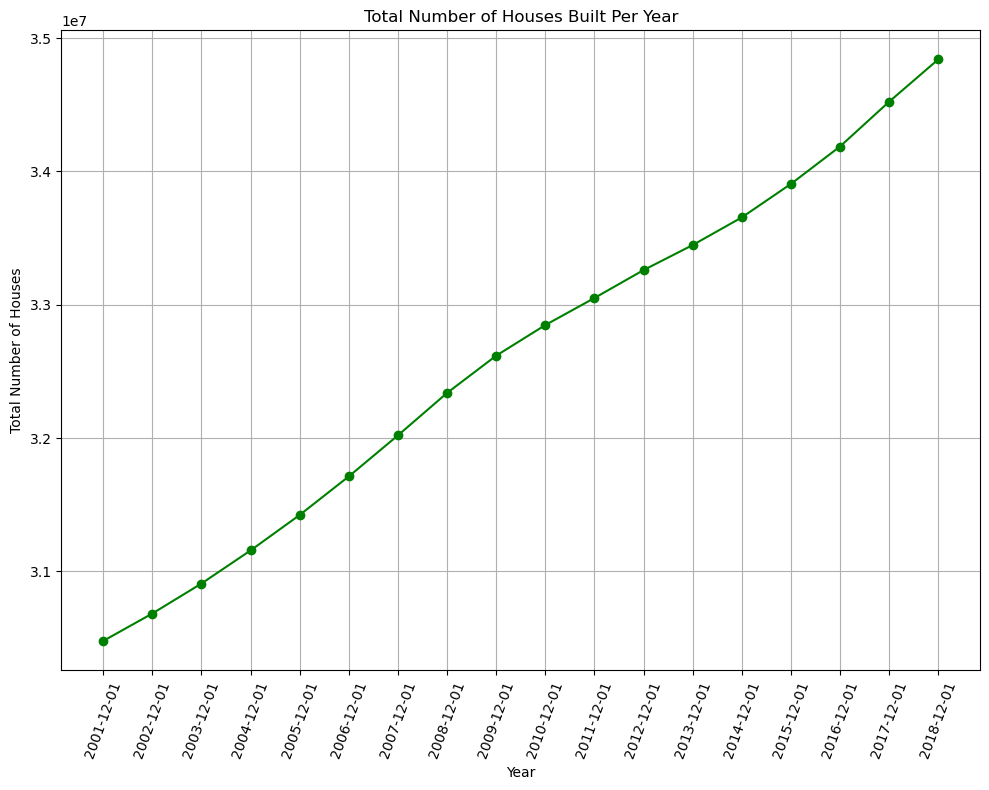

In [18]:
# Drop rows where 'no_of_houses' or 'date' is missing
df = df.dropna(subset=['no_of_houses', 'date'])

# Group by date and sum the number of houses
houses_per_year = df.groupby('date')['no_of_houses'].sum().reset_index()

# Sort by date if needed (ensure dates are in correct order)
houses_per_year = houses_per_year.sort_values('date')

# Create the plot
plt.figure(figsize=(10, 8))  # a. Set size
plt.plot(houses_per_year['date'], houses_per_year['no_of_houses'], color='green', marker='o')  # b. Green line

# c. and d. Label axes
plt.xlabel('Year')
plt.ylabel('Total Number of Houses')

# e. Title
plt.title('Total Number of Houses Built Per Year')

# f. Rotate dates
plt.xticks(rotation=70)

# Optional: Add grid and tighten layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### ✅ Brief Interpretation:

The graph visualizes the total number of houses built per year.The line moves upward, it indicates growth in housing development. This can help identify trends in urban development or population growth.


Top 4 areas with highest average number of houses:
            area  no_of_houses
10       england  2.267357e+07
25        london  3.313582e+06
28  outer london  1.931663e+06
19  inner london  1.381919e+06


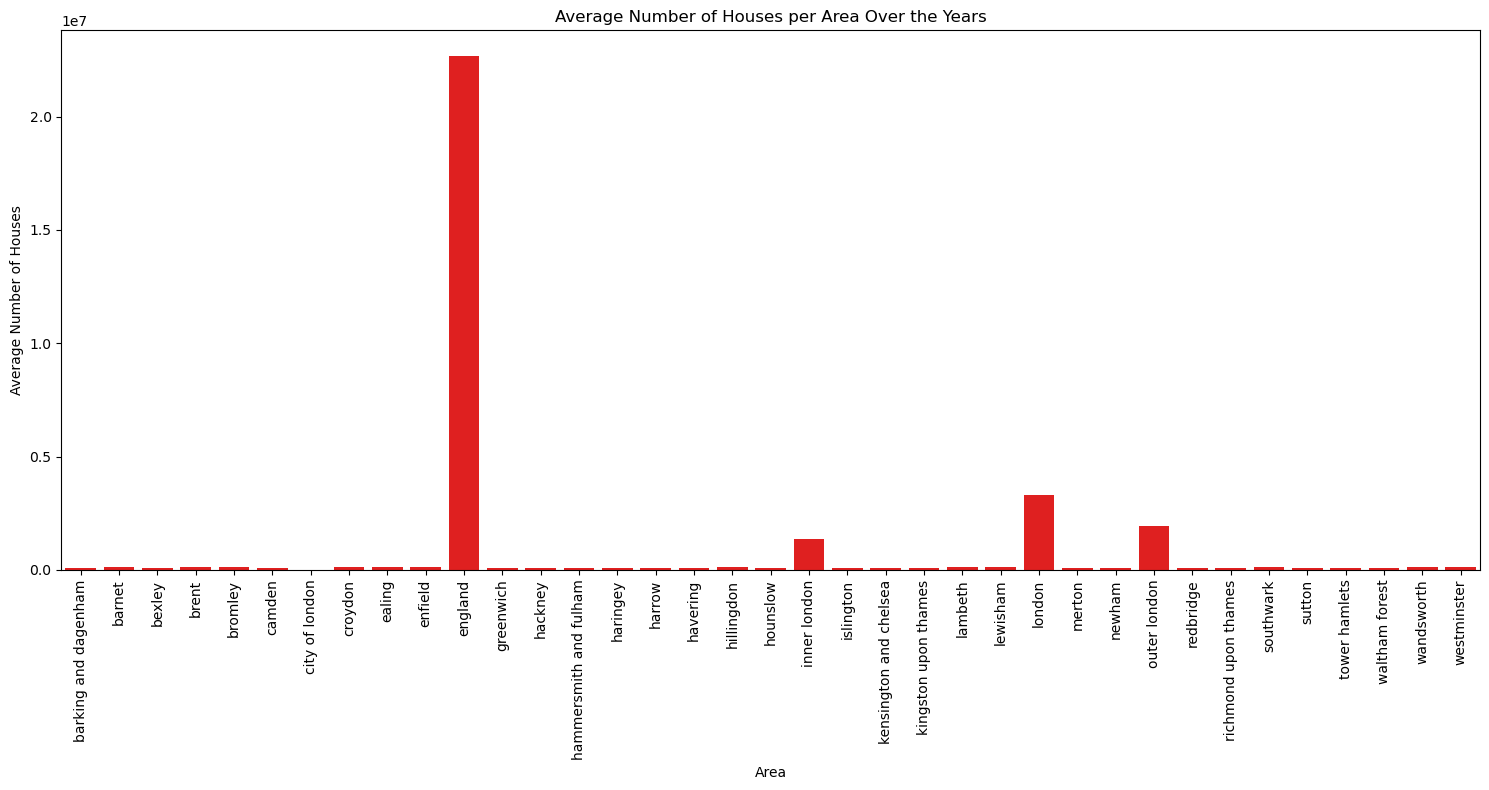

In [20]:
import seaborn as sns

# Drop missing values in relevant columns
df_clean = df.dropna(subset=['area', 'no_of_houses'])

# Group by area and calculate the average number of houses
avg_houses_by_area = df_clean.groupby('area')['no_of_houses'].mean().reset_index()

# Sort for identifying top 4
top_areas = avg_houses_by_area.sort_values('no_of_houses', ascending=False)

# d. List the top 4 areas with highest average number of houses
print("Top 4 areas with highest average number of houses:")
print(top_areas.head(4))

# Plotting
plt.figure(figsize=(15, 8))  # a. Set size
sns.barplot(data=avg_houses_by_area, x='area', y='no_of_houses', color='red')  # b. Red color

# c. Rotate area names
plt.xticks(rotation=90)

# Labeling
plt.xlabel('Area')
plt.ylabel('Average Number of Houses')
plt.title('Average Number of Houses per Area Over the Years')

plt.tight_layout()
plt.show()


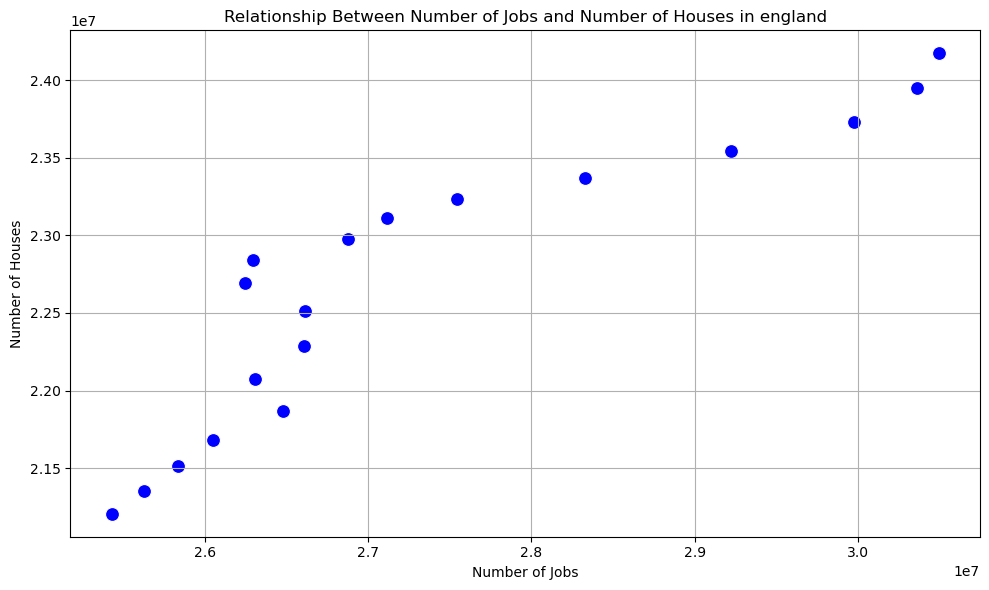

In [21]:
# Drop missing values
df_clean = df.dropna(subset=['area', 'no_of_houses', 'number_of_jobs'])

# Step 1: Find area with highest average number of houses
avg_houses = df_clean.groupby('area')['no_of_houses'].mean()
top_area = avg_houses.idxmax()

# Step 2: Create subset for this area
subset = df_clean[df_clean['area'] == top_area]

# Step 3: Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='number_of_jobs', y='no_of_houses', color='blue', s=100)

# Labeling
plt.title(f'Relationship Between Number of Jobs and Number of Houses in {top_area}')
plt.xlabel('Number of Jobs')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.tight_layout()
plt.show()


### ✅ **b. Observation**

> From the scatterplot, the points show an upward trend (i.e., as the number of jobs increases, the number of houses also increases), it suggests a **positive relationship**—areas with more jobs tend to have more houses, likely due to population growth or urban development.
> If the points are scattered with no clear trend, it suggests **no strong correlation** between jobs and housing in that area.
